In [64]:
import math
import numpy as np 
#from sklearn import tree
from IPython.display import Image  
#from sklearn.externals.six import StringIO
#import pydot
import pandas
import os
# Enter your directory here
os.chdir('/Users/abkhanna/Documents/workspace/Princeton/cos424/a2/methylation_imputation-master')

In [65]:
train_bed = pandas.read_csv('data/intersected_final_chr1_cutoff_20_train.bed', sep='\t', header=None)
sample_p_bed = pandas.read_csv('data/intersected_final_chr1_cutoff_20_sample_partial.bed', sep='\t', header=None)
sample_f_bed = pandas.read_csv('data/intersected_final_chr1_cutoff_20_sample_full.bed', sep='\t', header=None)

In [73]:
train_bed[list(range(4,37))]

,4,5,6,7,8,9,10,11,12,13,...,27,28,29,30,31,32,33,34,35,36
0,0.750000,0.681818,0.888889,0.518518,0.866667,0.971429,0.932203,0.942857,0.520000,NaN,...,0.880000,0.945946,NaN,NaN,0.875000,0.949152,0.861111,0.760000,NaN,0.437500
1,0.882353,0.705882,0.918367,0.842105,0.935484,0.964286,0.935065,0.978947,0.651163,NaN,...,0.960784,0.925532,NaN,NaN,0.909091,0.942529,0.814815,0.757576,NaN,0.660377
2,0.849315,0.843137,0.847458,0.883721,0.913043,0.922222,0.950617,0.952381,0.857143,NaN,...,0.962963,0.951456,NaN,NaN,0.916667,0.947917,0.918033,0.894737,0.921569,0.852459
3,0.868132,0.941176,0.939024,0.949152,0.956989,0.933333,0.958333,0.931034,0.916667,NaN,...,0.910256,0.889908,NaN,NaN,0.947368,0.684211,0.857143,0.916667,0.959459,0.974683
4,0.820513,0.962963,0.930556,0.795918,0.931507,0.929412,0.975000,0.956989,0.812500,NaN,...,0.949152,0.942529,NaN,NaN,0.869565,0.879310,0.882353,0.929412,0.970588,0.906250
5,0.661017,0.775510,0.887097,0.583333,0.880000,0.927536,0.937500,0.925000,0.545455,0.888889,...,NaN,0.878378,NaN,NaN,0.733333,0.945455,0.821429,0.742857,0.961538,0.777778
6,0.711864,0.804348,0.783333,0.676471,0.913043,0.941176,0.952381,0.944444,0.627907,0.789474,...,0.916667,0.942857,NaN,NaN,0.857143,0.814815,0.764706,0.805970,0.918367,0.750000
7,0.765957,0.714286,0.647059,0.821429,0.851064,0.714286,0.843137,0.833333,0.384615,0.888889,...,0.862069,NaN,NaN,NaN,NaN,0.934783,0.788462,0.658537,0.864865,0.521739
8,0.866667,0.892857,0.891304,0.944444,0.905660,0.762712,0.846154,0.828125,0.735849,0.911111,...,0.945946,NaN,NaN,NaN,NaN,0.967742,0.949152,0.900000,0.931818,0.875000
9,0.897436,0.880952,0.867925,0.958333,0.900000,0.737500,0.831325,0.852273,0.565217,0.915254,...,0.962264,0.964286,NaN,NaN,NaN,0.976744,0.888889,0.846154,0.936508,0.820513


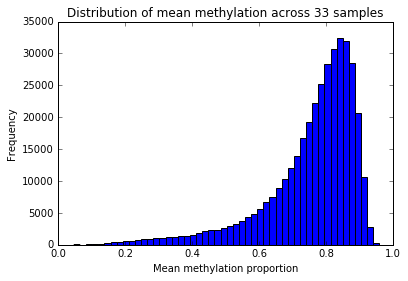

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt

# the histogram of the data
plt.hist(train_bed[list(range(4,37))].mean(axis=1).tolist(), 50)

plt.xlabel('Mean methylation proportion')
plt.ylabel('Frequency')
plt.title('Distribution of mean methylation across 33 samples')

plt.show()

In [66]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [18]:
table1 = train_bed[list(range(4,37))]
#table1
# table1
points = []
for c in table1:
    # get this rows nan_list
    nan_list = np.isnan(table1[c])
    for c2 in table1:
        # get the comparison rows nan_list
        nan_list2 = np.isnan(table1[c2])
        orred_list = np.logical_or(nan_list, nan_list2)
        filtered_list1 = [table1[c][i] for i in range(len(table1[c])) if ~orred_list[i]]
        filtered_list2 = [table1[c2][i] for i in range(len(table1[c2])) if ~orred_list[i]]
        distance = abs(c2 - c)
        cor_value = np.corrcoef(filtered_list1, filtered_list2)[0][1]
        print (c, c2)
        points.append((distance, cor_value))
print "Done"

(4, 4)
(4, 5)
(4, 6)
(4, 7)
(4, 8)
(4, 9)
(4, 10)
(4, 11)
(4, 12)
(4, 13)
(4, 14)
(4, 15)
(4, 16)
(4, 17)
(4, 18)
(4, 19)
(4, 20)
(4, 21)
(4, 22)
(4, 23)
(4, 24)
(4, 25)
(4, 26)
(4, 27)
(4, 28)
(4, 29)
(4, 30)
(4, 31)
(4, 32)
(4, 33)
(4, 34)
(4, 35)
(4, 36)
(5, 4)
(5, 5)
(5, 6)
(5, 7)
(5, 8)
(5, 9)
(5, 10)
(5, 11)
(5, 12)
(5, 13)
(5, 14)
(5, 15)
(5, 16)
(5, 17)
(5, 18)
(5, 19)
(5, 20)
(5, 21)
(5, 22)
(5, 23)
(5, 24)
(5, 25)
(5, 26)
(5, 27)
(5, 28)
(5, 29)
(5, 30)
(5, 31)
(5, 32)
(5, 33)
(5, 34)
(5, 35)
(5, 36)
(6, 4)
(6, 5)
(6, 6)
(6, 7)
(6, 8)
(6, 9)
(6, 10)
(6, 11)
(6, 12)
(6, 13)
(6, 14)
(6, 15)
(6, 16)
(6, 17)
(6, 18)
(6, 19)
(6, 20)
(6, 21)
(6, 22)
(6, 23)
(6, 24)
(6, 25)
(6, 26)
(6, 27)
(6, 28)
(6, 29)
(6, 30)
(6, 31)
(6, 32)
(6, 33)
(6, 34)
(6, 35)
(6, 36)
(7, 4)
(7, 5)
(7, 6)
(7, 7)
(7, 8)
(7, 9)
(7, 10)
(7, 11)
(7, 12)
(7, 13)
(7, 14)
(7, 15)
(7, 16)
(7, 17)
(7, 18)
(7, 19)
(7, 20)
(7, 21)
(7, 22)
(7, 23)
(7, 24)
(7, 25)
(7, 26)
(7, 27)
(7, 28)
(7, 29)
(7, 30)
(7, 31)
(7, 32)


In [19]:
points

[(0, 1.0),
 (1, 0.87675048934666133),
 (2, 0.89546435136917257),
 (3, 0.84673993065167164),
 (4, 0.4207917028939237),
 (5, 0.41578774768881704),
 (6, 0.42153290209712208),
 (7, 0.41781584838723379),
 (8, 0.49660715672286937),
 (9, 0.75693387801309941),
 (10, 0.71976600134712176),
 (11, 0.46522140429933728),
 (12, 0.46768844781049373),
 (13, 0.55329494496802545),
 (14, 0.59554365824595878),
 (15, 0.45788684592880452),
 (16, 0.47433110225232167),
 (17, 0.41947049195863134),
 (18, 0.66284894065497435),
 (19, 0.41909202994041517),
 (20, 0.46173995773853094),
 (21, 0.43169352414027456),
 (22, 0.4288153157707994),
 (23, 0.44177647232333944),
 (24, 0.4516767391963063),
 (25, 0.49535860287902439),
 (26, 0.40810496436953031),
 (27, 0.37948078783141165),
 (28, 0.44570888351864008),
 (29, 0.59470611024569398),
 (30, 0.46990508033947664),
 (31, 0.43006090242268963),
 (32, 0.70112985728801214),
 (1, 0.87675048934666133),
 (0, 1.0),
 (1, 0.86928061613218388),
 (2, 0.87791092569564078),
 (3, 0.380733

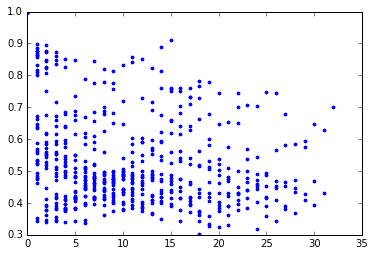

In [29]:
import matplotlib.pyplot as plt
x = [float(point[0]) for point in points]
y = [float(point[1]) for point in points]
plt.plot(x,y,'.')

In [30]:
z = np.polyfit(x,y,4)

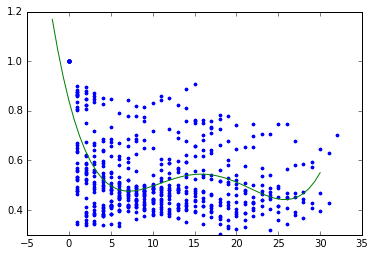

In [34]:
xp = np.linspace(-2, 30, 50)
p = np.poly1d(z)
plt.plot(x, y, '.', xp, p(xp), '-')

In [146]:
table1 = train_bed[list(range(4,37))]
points = []
window_size = 10

for r in table1.iterrows():
    nan_list = np.isnan(r[1])
    for r2 in table1.loc[max(r[0]-window_size, 4):min(r[0]+window_size, 379551)].iterrows():
        # get the comparison rows nan_list
        nan_list2 = np.isnan(r2[1])
        orred_list = np.logical_or(nan_list, nan_list2)
        filtered_list1 = [r[1][i] for i in range(4,len(r[1])) if ~orred_list[i]]
        filtered_list2 = [r2[1][i] for i in range(4,len(r2[1])) if ~orred_list[i]]
        distance = abs(train_bed[1][r2[0] - 4] - train_bed[1][r[0]])
#         print distance
        cor_value = np.corrcoef(filtered_list1, filtered_list2)[0][1]
#         print (r[0]+4, r2[0])
        points.append((distance, cor_value))
        

print "Done"

KeyboardInterrupt: 

In [149]:
# lets take the mean of the correlation values at any given distance
averages = []
for i in range(0,200):
    tmp_list = []
    for p in points:
        if p[0] == i:
            print p[1]
            tmp_list.append(p[1])
#     print i
    if len(tmp_list) == 0:
        continue
    else:
        averages.append((i, np.mean(tmp_list)))


0.608847521329
0.645684915919
0.551187815842
0.0852778441899
0.189389799276
0.478104356024
0.751317844292
0.62876312823
0.804124264478
0.795469402243
0.953728776439
0.89734990796
0.715956439759
0.769158545496
0.606597623817
0.732683053432
0.178436906633
0.176327448595
0.280268010003
0.421071515889
0.235723579935
-0.0722274218693
0.571707908473
0.010085549547
0.182814375418
0.528645010862
0.378135870631
-0.431378084717
0.468523598672
-0.106105289021
0.676250323691
0.34720534188
0.777784076087
0.706644835946
0.652525758648
-0.132905727934
-0.130448409388
0.079393039503
-0.326185489982
-0.123094029513
-0.224530436539
0.130441720653
-0.0917048060729
-0.142551089282
0.510080116576
-0.0123427193886
-0.300621786728
-0.0154496720994
-0.00717537719668
0.00232883348305
0.332441875878
0.613079601678
-0.0935538706147
0.738618206167
0.268995331131
0.539075463979
0.403043235557
0.658677020196
0.154393343039
0.476069492886
0.60826172978
0.77856768432
0.563769708841
0.610073859274
0.681862525987
0.590

In [167]:
averages

[(0, 0.19763277494139775),
 (2, 0.29523357146598567),
 (3, 0.39922343233470819),
 (4, 0.39538178046178202),
 (5, 0.37520663461122683),
 (6, 0.27643054829583946),
 (7, 0.36765729793738383),
 (8, 0.30519132925753617),
 (9, 0.39428584545592427),
 (10, 0.30158684213126252),
 (11, 0.2087454969298424),
 (12, 0.31251819352253457),
 (13, 0.25410185573531407),
 (14, 0.25598121351765935),
 (15, 0.37661436357702938),
 (16, 0.24060804613804052),
 (17, 0.18248881601457806),
 (18, 0.28518503826986236),
 (19, 0.33908845465272097),
 (20, 0.35664470746822852),
 (21, 0.38736875763003398),
 (22, 0.28295938278767657),
 (23, 0.31112852212911912),
 (24, 0.28875285136375178),
 (25, 0.27111321875892891),
 (26, 0.44970798935067369),
 (27, 0.26752136983360009),
 (28, 0.27256360167821125),
 (29, 0.4642276291678798),
 (30, 0.34073835674997566),
 (31, 0.26529103598552511),
 (32, 0.2776959523487228),
 (33, 0.24360375719582256),
 (34, 0.28827820060397308),
 (35, 0.36911914242927124),
 (36, 0.28336693023100556),
 (37

(array([  64.,  288.,  284.,  132.,   90.,   72.,   50.,   50.,   26.,   33.]),
 array([ 0.30341384,  0.37307246,  0.44273107,  0.51238969,  0.58204831,
         0.65170692,  0.72136554,  0.79102415,  0.86068277,  0.93034138,  1.        ]),
 <a list of 10 Patch objects>)

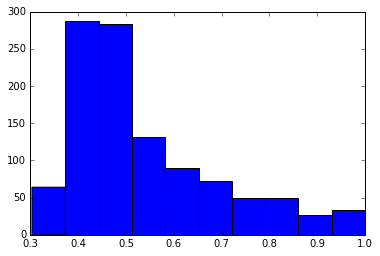

In [172]:
x_rows = [float(point[0]) for point in averages]
y_rows = [float(point[1]) for point in averages]
# heatmap, xedges, yedges = np.histogram2d(x_rows, y_rows)
# extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

# plt.clf()
# plt.imshow(heatmap)
# plt.show()
# plt.plot(x_rows, y_rows, '.')
plt.hist(y)

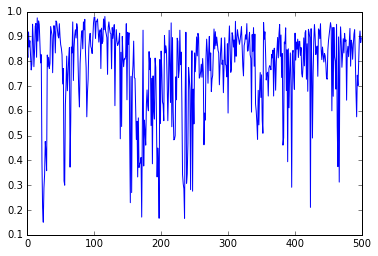

In [197]:
elms = [e for e in table1[33] if ~np.isnan(e)]
xs = [i for i in range(len(elms))]
plt.plot(xs[:500], elms[:500])